In [4]:
%matplotlib inline
%load_ext pyopencl.ipython_ext

The pyopencl.ipython_ext extension is already loaded. To reload it, use:
  %reload_ext pyopencl.ipython_ext


In [5]:
import numpy as np
import pyopencl as cl
from matplotlib import pyplot as plt
import os

In [7]:
#Make sure that we get the OpenCL compiler output to screen
os.environ["PYOPENCL_COMPILER_OUTPUT"] = "1"

In [8]:
cl_ctx = cl.create_some_context()
print("Running on "+cl_ctx.devices[0].name)

Running on Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz


In [10]:
cl_queue = cl.CommandQueue(cl_ctx)

In [18]:
%%cl_kernel
__kernel void addKernel(__global float*c, __global const float* a, __global const float* b){
    int tid = get_global_id(0);
    c[tid] = a[tid] + b[tid];
}

/usr/local/lib/python2.7/dist-packages/pyopencl-2015.1-py2.7-linux-x86_64.egg/pyopencl/__init__.py:59: CompilerWarning: Built kernel retrieved from cache. Original from-source build had warnings:
Build on <pyopencl.Device 'Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz' on 'Intel(R) OpenCL' at 0x31c70d8> succeeded, but said:

Compilation started
Compilation done
Linking started
Linking done
Device build started
Device build done
Kernel <addKernel> was successfully vectorized (4)
Done.
  warn(text, CompilerWarning)
/usr/local/lib/python2.7/dist-packages/pyopencl-2015.1-py2.7-linux-x86_64.egg/pyopencl/__init__.py:59: CompilerWarning: From-binary build succeeded, but resulted in non-empty logs:
Build on <pyopencl.Device 'Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz' on 'Intel(R) OpenCL' at 0x31c70d8> succeeded, but said:

Device build started
Device build done
Reload Program Binary Object.
  warn(text, CompilerWarning)


In [25]:
nx = 50

a = np.random.rand(nx).astype(np.float32)
b = np.random.rand(nx).astype(np.float32)
c = np.empty_like(a)

mf = cl.mem_flags

a_g = cl.Buffer(cl_ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=a)
b_g = cl.Buffer(cl_ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=b)
c_g = cl.Buffer(cl_ctx, mf.WRITE_ONLY, c.nbytes)

#1 especifica que el kernel estará en esa cola
#2 indica el número de threads
#3 block decomposition
#4 argumentos
addKernel(cl_queue, a.shape, None, c_g, a_g, b_g)

cl.enqueue_copy(cl_queue, c, c_g)



In [26]:
print(c.dtype)

float32


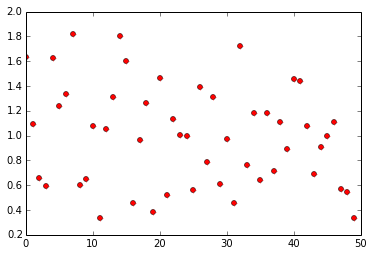

In [30]:
plt.figure()
plt.plot(c, 'ro', markersize = 5)
#plt.plot(a, 'k+')
#plt.plot(b, 'r*')
plt.plot(a+b, 'r+')

In [31]:
print(c)

[ 1.63543665  1.09517837  0.65424991  0.5970751   1.62399888  1.24108076
  1.33478642  1.82337666  0.59767306  0.65389979  1.08109474  0.33566773
  1.05680573  1.3095932   1.80627036  1.60208488  0.45748705  0.9640497
  1.26682258  0.38508797  1.46785438  0.52073175  1.13290155  1.00365245
  0.99849051  0.5603565   1.39133716  0.78466898  1.31305218  0.60671067
  0.97157979  0.45446268  1.72329068  0.76107973  1.18262506  0.64184695
  1.18473053  0.71151173  1.10602725  0.89182472  1.45364404  1.44183159
  1.07353616  0.69035435  0.90942991  1.00079906  1.11244535  0.57095516
  0.54761952  0.33559689]
